UK Labour Market Tightnes (2020-2025) 

This short Data Analysis project uses rolling 3-month data sourced from the ONS to examine the tightness of the UK Labour Market between 2020 and 2025, measured by the Unemployment-to-Vacancy Ratio . 

Further, the final graph illustrates the sitting Prime Minister at the time and the political party to which they belong. 

NOTE: 
The dates used in the analysis are those at the end of the 3 month rolling period. E.g. Nov - Jan 2020 would be Jan 2020. 

Import relevant libraries. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import the data, removing unncessary rows above the dataset. 

In [2]:
df = pd.read_csv('Desktop/Projects/UK_Labour_Market_Tightness/vacancies_unemployment.csv', skiprows=5)

Inspecing the dataset, we see there are unnecessary columns. 

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Apr-Jun 2001,NaN,680.0,1468,2.2,NaN,NaN,NaN,NaN
1,May-Jul 2001,NaN,674.0,1472,2.2,NaN,NaN,NaN,NaN
2,Jun-Aug 2001,NaN,663.0,1483,2.2,NaN,NaN,NaN,NaN
3,Jul-Sep 2001,NaN,663.0,1487,2.2,NaN,NaN,NaN,NaN
4,Aug-Oct 2001,NaN,639.0,1487,2.3,NaN,NaN,NaN,NaN


Remove these columns and set descriptive column names. 

In [4]:
df = df.drop(columns=df.columns[1])  
df = df.drop(columns=df.columns[5]) 
df = df.dropna(axis=1,how='all')
df = df.set_axis(['date','vacancies','unemployment','unemployed_to_vacancy'], axis=1)

In [5]:
df.head()

,date,vacancies,unemployment,unemployed_to_vacancy
0,Apr-Jun 2001,680.0,1468,2.2
1,May-Jul 2001,674.0,1472,2.2
2,Jun-Aug 2001,663.0,1483,2.2
3,Jul-Sep 2001,663.0,1487,2.2
4,Aug-Oct 2001,639.0,1487,2.3


Inspect the data types. 

In [6]:
df.dtypes

date                      object
vacancies                float64
unemployment              object
unemployed_to_vacancy     object
dtype: object

Upon inspection, we observe both the date and the unemployment-to-vacancy ratio have incorrect data types. This is corrected below. 

A new column, end_date, is created and assigned the appropriate type. 
The ratio is also converted to a numeric value. 

In [7]:
df["end_date"] = df["date"].str.split("-").str[1]
df["end_date"] = pd.to_datetime(df["end_date"], errors='coerce', format="%b %Y")
df["unemployed_to_vacancy"] = pd.to_numeric(df["unemployed_to_vacancy"], errors ='coerce')

In [8]:
df.head()

,date,vacancies,unemployment,unemployed_to_vacancy,end_date
0,Apr-Jun 2001,680.0,1468,2.2,2001-06-01
1,May-Jul 2001,674.0,1472,2.2,2001-07-01
2,Jun-Aug 2001,663.0,1483,2.2,2001-08-01
3,Jul-Sep 2001,663.0,1487,2.2,2001-09-01
4,Aug-Oct 2001,639.0,1487,2.3,2001-10-01


Our analysis is only concerned with data between 2020 and 2025. The dataset must be filtered to only include the relevant data. Upon inspection of the tails of the dataset, we can see this is filtered correctly. 

In [9]:
df = df.loc[223:303]
df.head(-5)

,date,vacancies,unemployment,unemployed_to_vacancy,end_date
223,Nov-Jan 2020,812.0,1341,1.7,2020-01-01
224,Dec-Feb 2020,819.0,1364,1.7,2020-02-01
225,Jan-Mar 2020,795.0,1411,1.8,2020-03-01
226,Feb-Apr 2020,637.0,1400,2.2,2020-04-01
227,Mar-May 2020,471.0,1408,3.0,2020-05-01
...,...,...,...,...,...
294,Oct-Dec 2025,734.0,..,NaN,2025-12-01
295,NaN,NaN,NaN,NaN,NaT
296,NaN,NaN,NaN,NaN,NaT
297,NaN,NaN,NaN,NaN,NaT


Isolate the relevant columns and assign them to variables for easy access. 

In [10]:
end_date = df["end_date"]
ratio = df["unemployed_to_vacancy"]

Create variables of when Prime Ministers took office and also create relevant pandas seris which will be used later to highlight which political party is in office. 

In [11]:
starmer = pd.to_datetime("2024-07")
sunak = pd.to_datetime("2022-10")
truss = pd.to_datetime("2022-09")

before_starmer_x = df[df["end_date"] <= starmer]["end_date"]
after_starmer_x = df[df["end_date"] >= starmer]["end_date"]

before_starmer_y = df[df["end_date"] <= starmer]["unemployed_to_vacancy"]
after_starmer_y = df[df["end_date"] >= starmer]["unemployed_to_vacancy"]

Finally, create the plot of the data. 

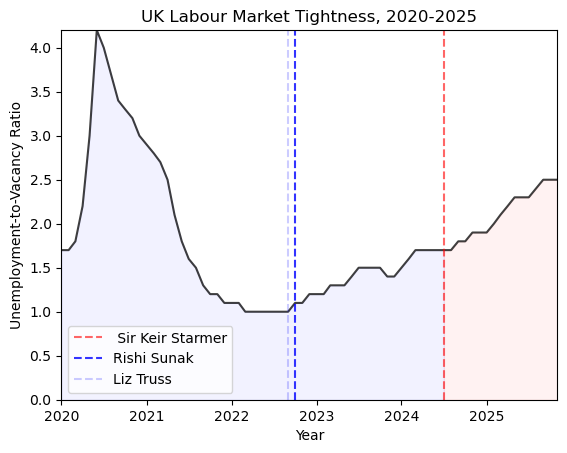

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(end_date, ratio, color='black', alpha=0.75)
plt.title("UK Labour Market Tightness, 2020-2025")
plt.ylabel("Unemployment-to-Vacancy Ratio")
plt.xlabel("Year")
plt.axvline(starmer, alpha=0.6, color='r', linestyle ="--", label=" Sir Keir Starmer")
plt.axvline(sunak, alpha=0.8, color='b', linestyle ="--", label="Rishi Sunak")
plt.axvline(truss, alpha=0.2, color='b', linestyle ="--", label="Liz Truss")
plt.fill_between(before_starmer_x, before_starmer_y, alpha=0.05, color='blue')
plt.fill_between(after_starmer_x, after_starmer_y, alpha=0.05, color='red')
plt.margins(0,0)
plt.legend()
plt.show()
plt.clf()